In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
import math
import struct

import xarray

%matplotlib inline
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "animation.html" : 'html5'}
plt.rcParams.update(params)

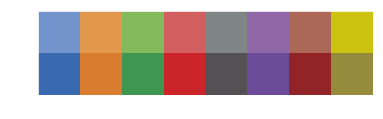

In [2]:
def div255(c):
    return [(r/255, g/255, b/255) for (r, g, b) in c]
mycolors1 = div255([
    (114, 147, 203),
    (225,151,76),
    (132, 186, 91),
    (211, 94, 96),
    (128,133,133),
    (144,103,167),
    (171,104,87),
    (204,194,16)    
])

mycolors2 = div255([
    (57,106,177),
    (218,124,48),
    (62,150,81),
    (204,37,41),
    (83,81,84),
    (107,76,154),
    (146,36,40),
    (148,139,61)
])

plt.imshow([mycolors1, mycolors2]);

mycolors = [mycolors1[i] for i in [0, 2, 3, 1]]


In [3]:
import sys
folder = "../build/x64-Release/benchmarks/results/mountain/"
if not folder in sys.path:
    sys.path.append(folder)

if 'pits' in sys.modules.keys():
    del sys.modules['pits']
from pits import pits
import sys
folder = "../build/x64-Release/benchmarks/results/mountain/"
if not folder in sys.path:
    sys.path.append(folder)

if 'bench' in sys.modules.keys():
    del sys.modules['bench']
from bench import bench
def get_bench_prop(size, algo):
    
    x = []
    x_num = []
    y = []
    
    for p, pd in bench[size].items():
        x.append(p)
        x_num.append(pd['numholes'])
        y.append(pd[algo])
    
    return (x_num, 
           [i for (i, _, _) in y])


def get_time(min_loc, algo):
    ref_ml, ref_time = get_bench_prop(4096, algo)
    return np.interp(min_loc, ref_ml, ref_time)

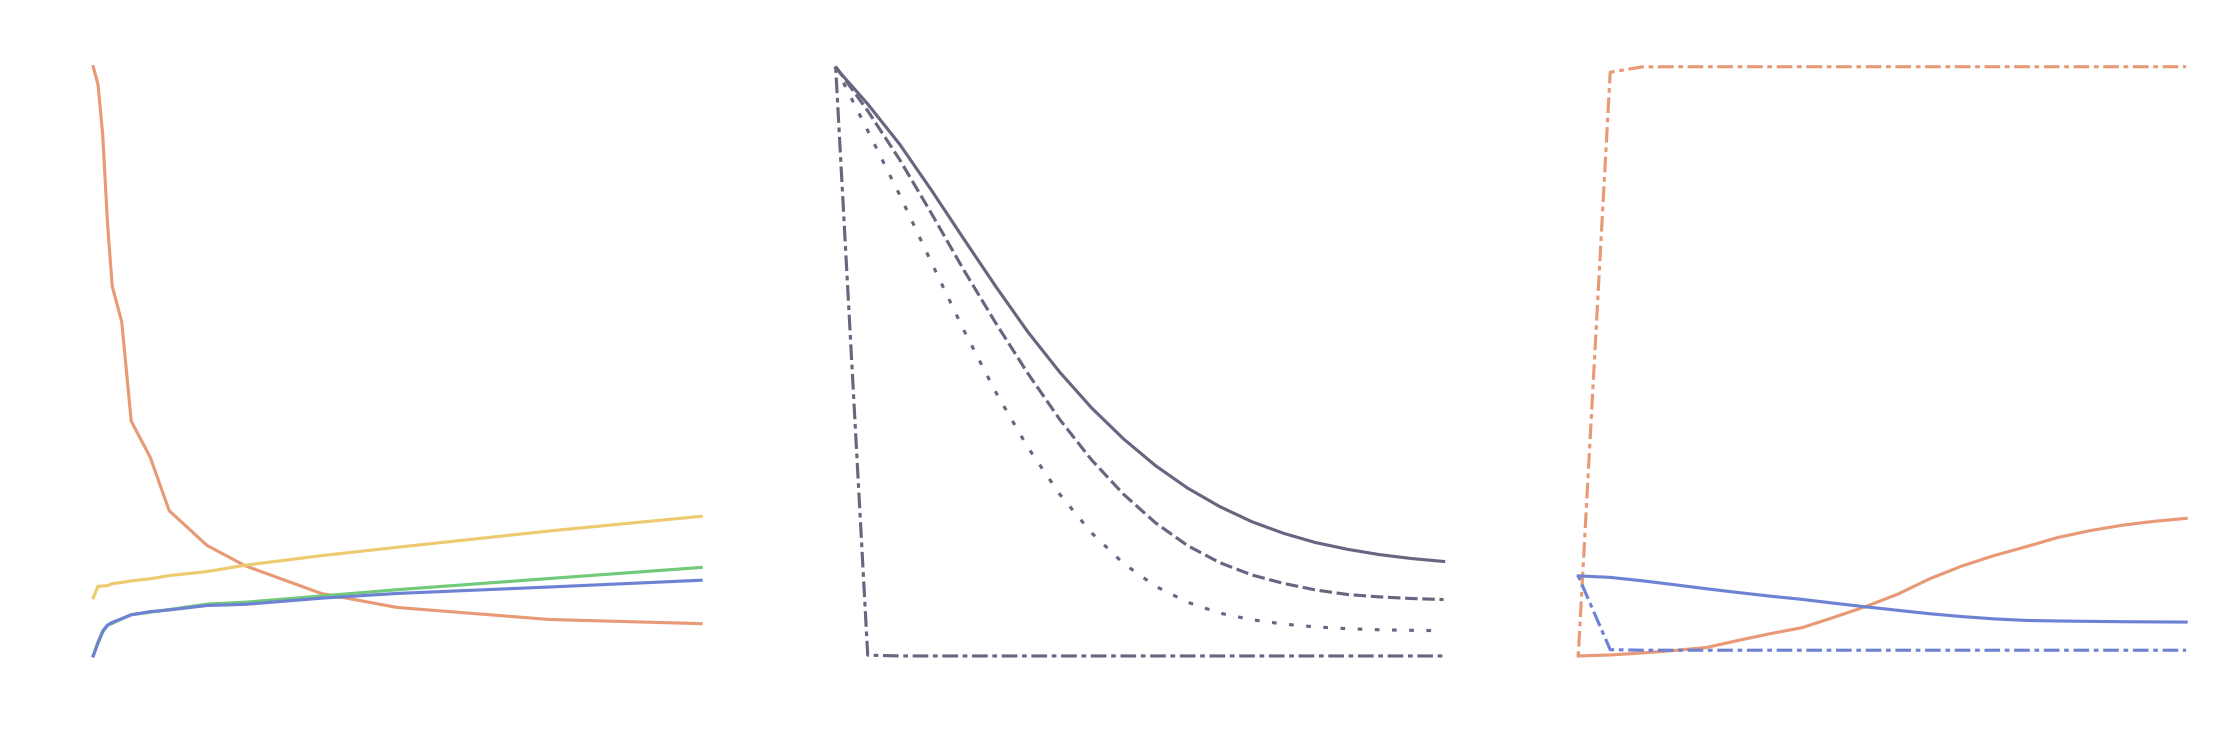

In [4]:
fig, axes = plt.subplots(ncols = 3, figsize=(15,5), dpi = 150)

mycolors_ref = div255([
    (114, 147, 203), #bleu
    (225,151,76), #orange
    (132, 186, 91), #vert
    (211, 94, 96), #rouge
    (128,133,133), #gris
    (144,103,167), #violet
    (171,104,87), #marron
    (55,158,163) #jaune
])
mycolors = [mycolors_ref[i] for i in [1, 5, 2, 0]]
mycolors = div255([
    (232,153,118),
    (237,202,111),
    
    (113,201,122),(110,130,212),])

dashes = [ (1.5,1.5,5,1.5),  (1.5, 4), (4, 1.5),()]

linewidth = 1.5


algos = [ k for k in bench.values().__iter__().__next__().values().__iter__().__next__().keys() if k != 'numholes' and "simple" not in k and "carve" not in k]
for i, algo in enumerate(['Sinks', 'Wei2018', 'Kruskal sloped', 'Boruvka sloped']):
    x, y = get_bench_prop(4096, algo)
    axes[0].plot(np.array(x)*1e-5, y, linewidth= linewidth, color = mycolors[i])


for k,v in enumerate(pits.values()):
    axes[1].plot(np.array(v)*1e-5, linewidth= linewidth, dashes = dashes[k], color = (.4,.4,.5))
    
pitkeys = list(pits.keys())
axes[2].plot(get_time(pits[pitkeys[0]], 'Sinks'), linewidth= linewidth, color = mycolors[0], dashes=dashes[0])
axes[2].plot(get_time(pits[pitkeys[-1]], 'Sinks'), linewidth= linewidth, color = mycolors[0], dashes=dashes[-1])
axes[2].plot(get_time(pits[pitkeys[0]], 'Boruvka sloped'), linewidth= linewidth, color = mycolors[-1], dashes=dashes[0])
axes[2].plot(get_time(pits[pitkeys[-1]], 'Boruvka sloped'), linewidth= linewidth, color = mycolors[-1], dashes=dashes[-1])
#plt.plot(pits[0]);
fig.tight_layout()
plt.savefig("pits.png")

###### 

In [213]:
np.array(list(pits.keys())) * 100

array([1.00000e-08, 3.33333e+00, 6.66667e+00, 1.00000e+01])

In [5]:
del sys.modules['bench']
del bench